### Import Dependencies

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from random import randint as rnd
import matplotlib.pyplot as plt

#### 30 X 75

In [2]:
rows, cols = 30, 75
numbers = [1, 2, 3, 4, 5, 6, 7]
probabilities = [0.7, 0.15, 0.09, 0.02, 0.02, 0.01, 0.01]
new_data = np.random.choice(numbers, size=(rows, cols), p=probabilities)

### Variables

In [3]:
# x = 60
# y = 20
population_size = 100
mutation_rate = 0.6
tournament_size = 5
generation = 1000
x = 75
y = 30

### Initial Population

In [4]:
def initial_population (x, y, pop_size):

    population_list = []

    for i in range(pop_size):

        #random initial pop
        random_pop = [random.randint(0, y-1) for _ in range(x)]
        # random_pop.sort()

        #zip x & y for point in map
        zipped_data = list(zip(range(0,x), random_pop))
        
        #last index for fitness
        zipped_data.append(None)

        population_list.append(zipped_data)

    return population_list

### Fitness Function

In [5]:
def fitness(population):

    road_fit = []
    
    for road in population:
        fitness = 0

        # -2 ?? skip none and step i+1
        for i in range(len(road)-2):

            # population[i][0] => y  |  population[i][1] => x
            # abs(x1 - x2) == 1, y1 == y2, abs(y1 - y2)
            x1 = road[i][0]
            y1 = road[i][1]
            x2 = road[i+1][0]
            y2 = road[i+1][1]

            if abs(x1 - x2) == 1 and (y1 == y2 or abs(y1 - y2) == 1):
                #add rufness level
                fitness += new_data[y1][x1]
            
            else:
                #euclidean distance ** 2
                fitness += (math.sqrt((x2 - x1)**2 + (y2 - y1)**2))**2
                
        #add fitness
        if len(road) == x + 1:
            road[-1] = fitness
        else:
            road.append(fitness)
            
        road_fit.append(road)

    return road_fit

### Parent Selection

In [6]:

def tournament_selection(population, tournament_size):
    parents = random.sample(population, tournament_size)
    best_parent = sorted(parents, key=lambda x:x[-1])
    return [best_parent[0], best_parent[1]] 



### Cross Over

In [7]:
def uniform_crossover(parents):
    child1 = []
    child2 = []

    for gene1, gene2 in zip(parents[0][:-1], parents[1][:-1]):
        if random.choice([True, False]):
            child1.append(gene1)
            child2.append(gene2)
        else:
            child1.append(gene2)
            child2.append(gene1)

    return child1, child2




### Mutation

In [8]:
def random_index_mutation(childs, mr):
    new_child = []
    for child in childs:
        if random.random() < mr:
            mutation_point = random.randint(0, len(child)-1)
            child[mutation_point] = (mutation_point ,np.random.randint(0, 20))
            new_child.append(list(child))
        else:
            new_child.append(list(child))

    return new_child


### Offsprings

In [9]:
def offsprings (population, num_offsprings):
    offsprings = []
    for i in range(num_offsprings):
        parent = tournament_selection(population, tournament_size)
        child = uniform_crossover(parent)
        child = random_index_mutation(child, mutation_rate) 
        offsprings.append(child[0])
        offsprings.append(child[1])
    return offsprings

### Result

## BEST MAX FIT ## : 82 
## BEST AVG FIT ## : 156.22 


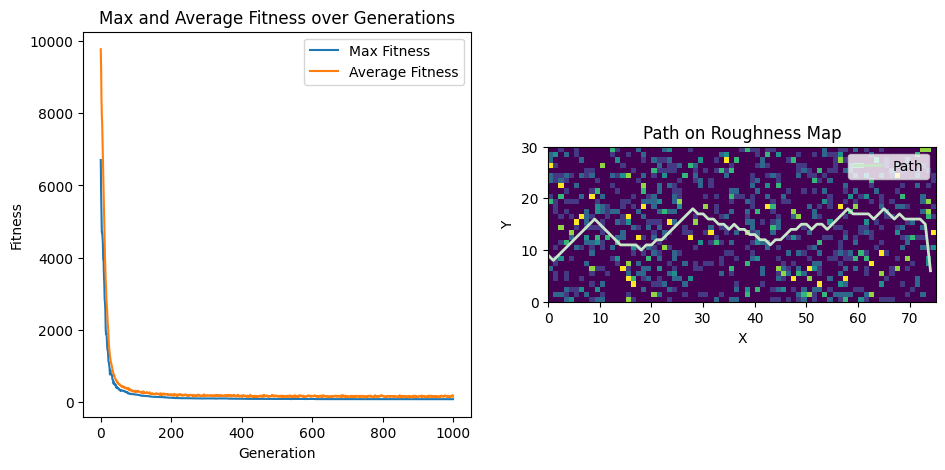

## BEST MAX FIT ## : 127.0 
## BEST AVG FIT ## : 197.11 


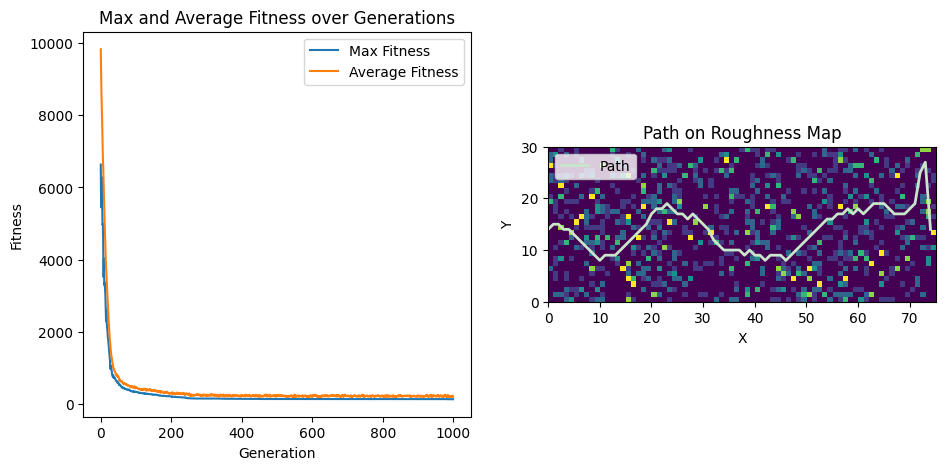

## BEST MAX FIT ## : 119.0 
## BEST AVG FIT ## : 197.89 


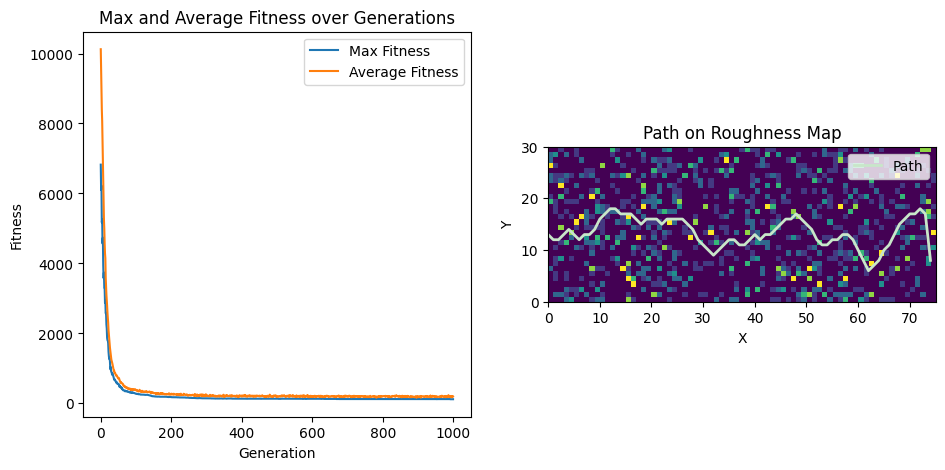

## BEST MAX FIT ## : 114.0 
## BEST AVG FIT ## : 187.68 


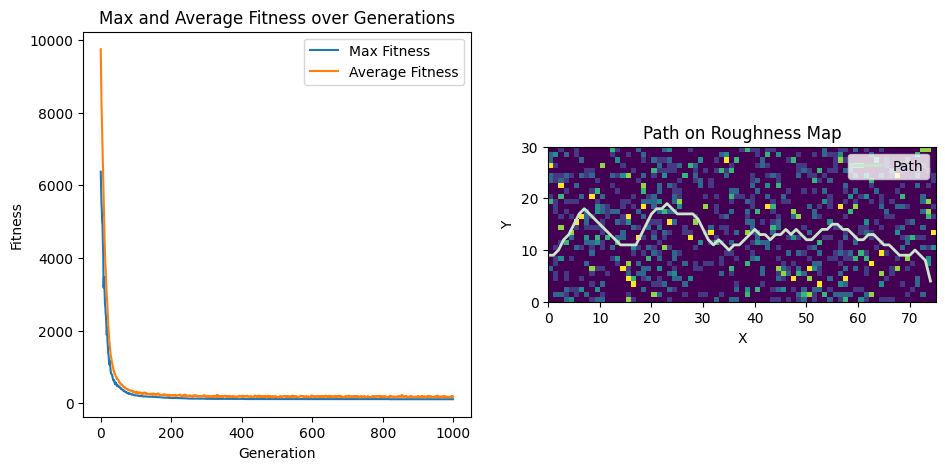

## BEST MAX FIT ## : 100.0 
## BEST AVG FIT ## : 171.08 


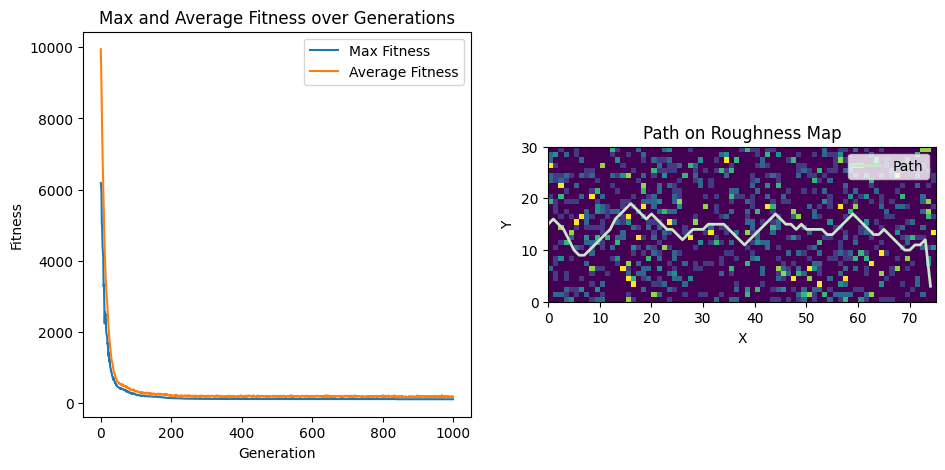

## BEST MAX FIT ## : 91.0 
## BEST AVG FIT ## : 167.27 


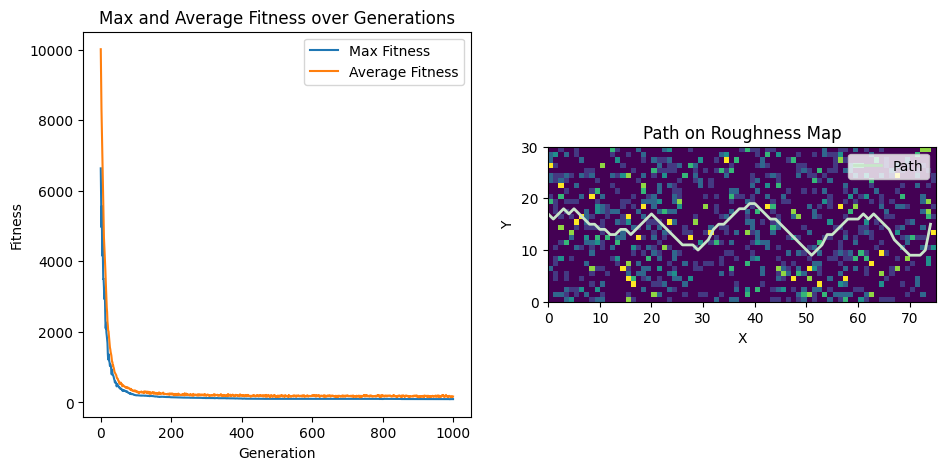

## BEST MAX FIT ## : 93.0 
## BEST AVG FIT ## : 161.29 


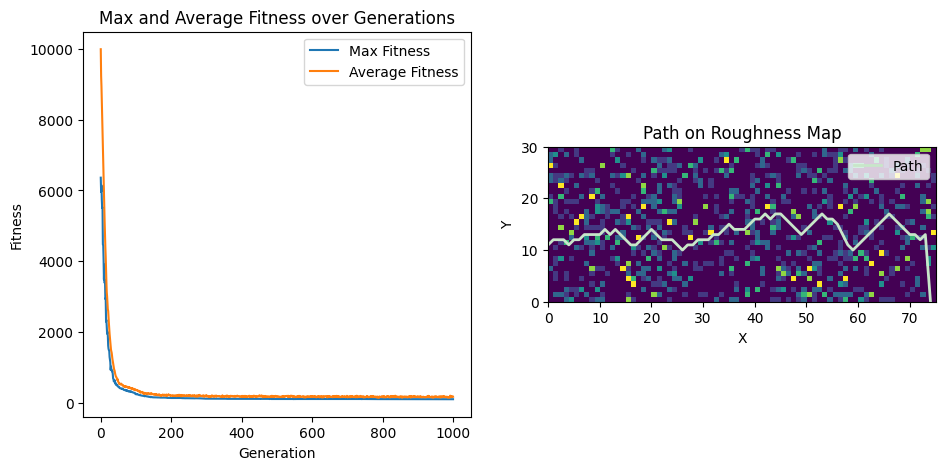

In [10]:
# ##### Setup 4
# Parent Selection : Tournament Selection
# Cross Over : Uniform Cross Over
# Mutation :  Random Index
# Survival selection : Generational
# -----------------------

def GA(generation):

    final_path = []
    max_fit = []
    avg_fit = []

    #1 : Initial Population
    population = initial_population(x, y, population_size)
    population = fitness(population)
    population = sorted(population, key=lambda x:x[-1])

    #GA Loop
    for g in range(generation):

        # ----------------Generate Offspring------------------

        population = offsprings (population, 50)

        population = fitness(population)

        population = sorted(population, key=lambda x:x[-1])
 
        # ------------------MAX & AVG-------------------

        max_fit.append(population[0][-1])
        sum = 0
        for k in population:
            sum += k[-1]
        avg_fit.append(sum / population_size)


        if g == generation-1:
            final_path = population[0]
            final_path.pop()
            

    print("===========================================================")
    print(f"## BEST MAX FIT ## : {min(max_fit)} ")
    print(f"## BEST AVG FIT ## : {avg_fit[-1]} ")
    print("===========================================================")



    #--------------------------------------------PLOT------------------------------------------

    
    figure_size = (11, 5)
    fig, axs = plt.subplots(1, 2, figsize=figure_size)
    axs[0].plot(max_fit, label='Max Fitness')
    axs[0].plot(avg_fit, label='Average Fitness')
    axs[0].set_xlabel('Generation')
    axs[0].set_ylabel('Fitness')
    axs[0].legend()
    axs[0].set_title('Max and Average Fitness over Generations')

    axs[1].imshow(new_data, cmap='viridis', origin='lower', extent=[0, new_data.shape[1], 0, new_data.shape[0]])
    x_vals = [point[0] for point in final_path]
    y_vals = [point[1] for point in final_path]
    axs[1].plot(x_vals, y_vals, color='#C8E6C9', linewidth=2 , label='Path')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    axs[1].set_title('Path on Roughness Map')
    axs[1].legend()
    plt.show()


    #--------------------------------------------------------------------------------------------


# 7 RUN
for i in range(7):
    GA(generation)
    
